# Capstone 2: Data Wrangling

## Imports

In [1]:
#Import necessary packages/libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns

The dataset used in this project is from Inside Airbnb and contains detailed information on each listing on the platform. It was compiled on Sept. 1, 2021.
It can be found here: http://insideairbnb.com/get-the-data.html

In [2]:
#This is the dataset with detailed info on the listings, compiled by Inside Airbnb Sept. 1, 2021
df_listings = pd.read_csv('NYC/listings_detailed.csv')
pd.set_option('max_columns', None)
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.021090e+13,9/2/2021,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/2008,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,34%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,5,35,65,340,9/2/2021,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,2.021090e+13,9/2/2021,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,12/7/2008,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,86%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,4,9,208,9/2/2021,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03
2,5121,https://www.airbnb.com/rooms/5121,2.021090e+13,9/2/2021,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/2009,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,9/2/2021,50,0,0,1/

## Overall Initial Look At The Dataset

In [3]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.021090e+13,9/2/2021,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/2008,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,34%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,5,35,65,340,9/2/2021,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,2.021090e+13,9/2/2021,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,12/7/2008,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,86%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,4,9,208,9/2/2021,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03
2,5121,https://www.airbnb.com/rooms/5121,2.021090e+13,9/2/2021,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/2009,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,9/2/2021,50,0,0,1/

In [4]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  float64
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

## Finding Missing Values

In [5]:
df_listings.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              13
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9296
Length: 74, dtype: int64

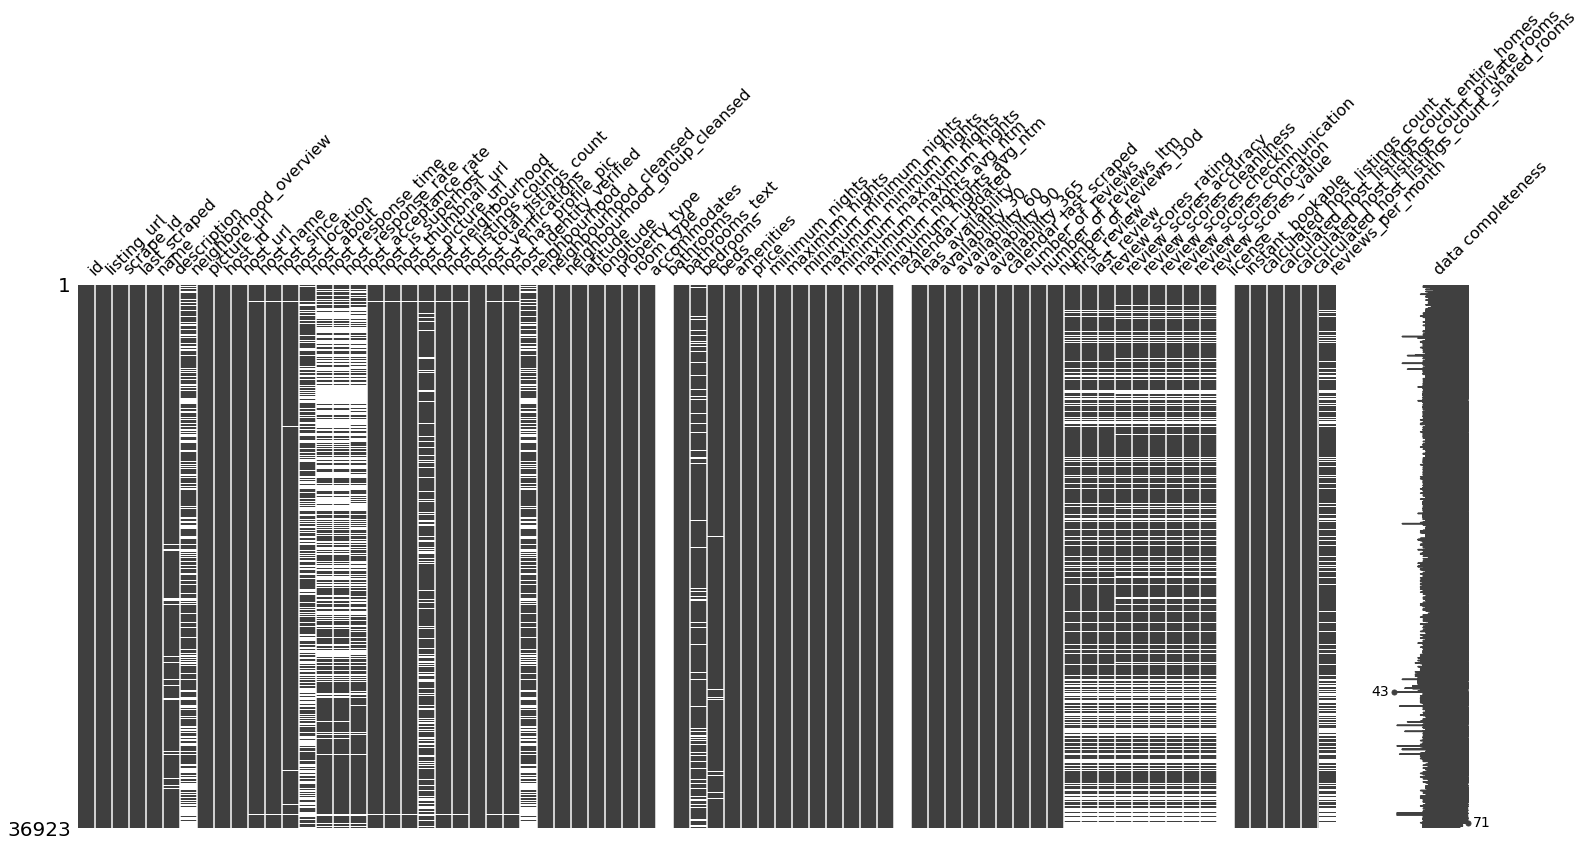

In [6]:
msno.matrix(df_listings, labels = True)
plt.show()

## Dropping Columns

Drop columns that are not relevant

In [7]:
drop_cols = ['last_scraped', 'name', 'description', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'listing_url', 'scrape_id']
df1 = df_listings.drop(drop_cols, axis=1)

Dropping columns that have all missing values

In [8]:
df1.drop(['bathrooms', 'calendar_updated', 'license', 'neighbourhood', 'neighborhood_overview'], axis=1, inplace=True)

In [9]:
df1.drop(['host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'latitude', 'longitude'], axis=1, inplace=True)

There are many versions of the information on minimum and maximum nights to spend at a listing. We will be removing all irrelevant ones.

In [10]:
df1.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [11]:
pd.set_option('max_columns', None)
df1.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2595,9/9/2008,a few days or more,34%,19%,f,t,Midtown,Manhattan,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33
1,3831,12/7/2008,within a day,50%,86%,f,t,Bedford-Stuyvesant,Brooklyn,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,5.03
2,5121,2/3/2009,within a day,100%,NaN,f,t,Bedford-Stuyvesant,Brooklyn,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,t,30,60,90,365,50,0,0,1/22/2014,6/5/2016,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,0.54
3,5136,2/3/2009,within a day,50%,33%,f,t,Sunset Park,Brooklyn,Entire rental unit,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",$275.00,5,1125,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,0.02
4,5178,3/3/2009,within an hour,100%,100%,f,f,Midtown,Manhattan,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",$68.00,2,14,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,3.64


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            36923 non-null  int64  
 1   host_since                    36812 non-null  object 
 2   host_response_time            21180 non-null  object 
 3   host_response_rate            21180 non-null  object 
 4   host_acceptance_rate          21821 non-null  object 
 5   host_is_superhost             36812 non-null  object 
 6   host_identity_verified        36812 non-null  object 
 7   neighbourhood_cleansed        36923 non-null  object 
 8   neighbourhood_group_cleansed  36923 non-null  object 
 9   property_type                 36923 non-null  object 
 10  room_type                     36923 non-null  object 
 11  accommodates                  36923 non-null  int64  
 12  bathrooms_text                36818 non-null  object 
 13  b

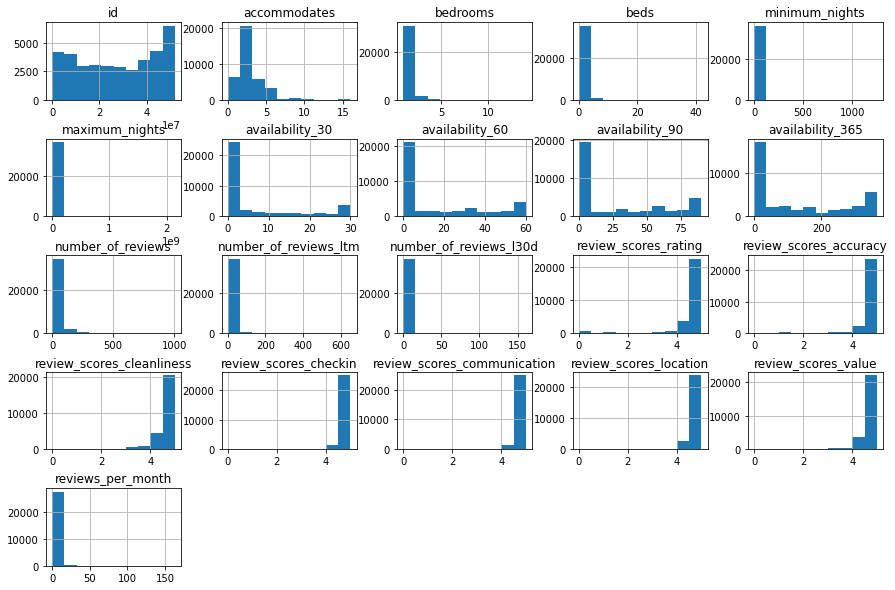

In [13]:
df1.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## Detailed Look At Individual Columns

### id

In [14]:
df1['id'].isna().sum()

0

No missing values. Thus, leaving the column as is.

### **host_since**

**From the data dictionary:** The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.

In [15]:
#Convert from object to datetime
df1['host_since'] = pd.to_datetime(df1['host_since'])

In [16]:
assert df1['host_since'].dtype=='datetime64[ns]'

In [17]:
df1['host_since'].isna().sum()

111

These rows will be dropped.

In [18]:
#remove rows with missing values
df1 = df1.dropna(subset=['host_since'])

### **host_response_time**

Take a closer look at the column

In [19]:
df1['host_response_time'].isna().sum()

15632

In [20]:
df1['host_response_time'].unique()

array(['a few days or more', 'within a day', 'within an hour', nan,
       'within a few hours'], dtype=object)

In [21]:
df1['host_response_time'].value_counts()

within an hour        10775
within a few hours     4748
within a day           3567
a few days or more     2090
Name: host_response_time, dtype: int64

Fill in missing values

In [22]:
#Create a new value called 'not available' for all the missing values
df1['host_response_time'] = df1['host_response_time'].fillna('not available')

In [23]:
df1['host_response_time'].value_counts()

not available         15632
within an hour        10775
within a few hours     4748
within a day           3567
a few days or more     2090
Name: host_response_time, dtype: int64

### host_response_rate

Take a closer look at the column

In [24]:
df1['host_response_rate'].unique()

array(['34%', '50%', '100%', nan, '89%', '90%', '94%', '92%', '97%',
       '83%', '88%', '93%', '20%', '0%', '75%', '95%', '67%', '80%',
       '38%', '96%', '86%', '13%', '60%', '62%', '82%', '70%', '56%',
       '63%', '43%', '71%', '57%', '11%', '30%', '25%', '40%', '14%',
       '98%', '46%', '29%', '69%', '10%', '54%', '68%', '22%', '21%',
       '81%', '23%', '33%', '91%', '77%', '73%', '78%', '87%', '7%',
       '53%', '76%', '17%', '16%', '19%', '99%', '85%', '39%', '79%',
       '72%', '58%', '65%', '44%', '31%', '8%', '55%', '47%', '74%',
       '84%', '64%', '48%', '9%', '15%', '59%', '6%', '36%', '5%', '49%',
       '18%', '32%', '28%', '4%', '3%', '66%', '42%', '61%', '27%', '41%',
       '12%', '26%'], dtype=object)

In [25]:
df1['host_response_rate'].isna().sum()

15632

This is the same number of missing values as the number of missing values in the **host_response_time**.

In [26]:
#Remove '%' sign
df1['host_response_rate'] = df1['host_response_rate'].str.strip('%')

In [27]:
#Convert to numeric values
df1['host_response_rate'] = df1['host_response_rate'].astype('float')

In [28]:
df1['host_response_rate'].mean()

86.79376770538244

In [29]:
df1['host_response_rate'].median()

100.0

Since a majority of the values are missing and this may be an important field in our future analyses and calculations, all missing values will be substituted with "unavailable"

In [30]:
df1['host_response_rate'] = df1['host_response_rate'].fillna('not available')

### host_acceptance_rate

In [31]:
df1['host_acceptance_rate'].unique()

array(['19%', '86%', nan, '33%', '100%', '0%', '29%', '67%', '97%', '74%',
       '76%', '95%', '77%', '85%', '89%', '83%', '98%', '9%', '46%',
       '11%', '75%', '61%', '73%', '20%', '44%', '92%', '93%', '96%',
       '59%', '50%', '25%', '78%', '2%', '8%', '58%', '66%', '35%', '81%',
       '45%', '6%', '88%', '38%', '40%', '39%', '60%', '99%', '87%',
       '91%', '36%', '80%', '15%', '71%', '90%', '53%', '63%', '52%',
       '30%', '69%', '84%', '94%', '21%', '56%', '79%', '31%', '64%',
       '43%', '17%', '62%', '18%', '27%', '82%', '72%', '23%', '65%',
       '57%', '13%', '32%', '55%', '47%', '68%', '22%', '42%', '48%',
       '49%', '4%', '28%', '70%', '16%', '3%', '41%', '14%', '12%', '54%',
       '10%', '5%', '51%', '24%', '26%', '7%', '34%', '37%', '1%'],
      dtype=object)

In [32]:
df1['host_acceptance_rate'].isna().sum()

14991

Convert values from strings to numeric values

In [33]:
#Remove % sign
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.strip('%')
#Convert to numeric values
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype('float')

Since a majority of the values are missing and this may be an important field in our future analyses and calculations, all missing values will be substituted with "unavailable"

In [34]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].fillna('not available')

### host_is_superhost

In [35]:
df1 = df1.replace({'host_is_superhost': {'t':True, 'f':False}})

In [36]:
df1['host_is_superhost'].isna().sum()

0

### host_identity_verified

Changing the **t/f** values to Boolean values:

In [37]:
df1 = df1.replace({'host_identity_verified': {'t':True, 'f':False}})

In [38]:
df1['host_identity_verified'].isna().sum()

0

### neighbourhood_cleansed

In [39]:
pd.set_option("display.max_rows", None)
df1['neighbourhood_cleansed'].value_counts().to_frame()

,neighbourhood_cleansed
Bedford-Stuyvesant,2676
Williamsburg,2578
Harlem,1932
Bushwick,1685
Hell's Kitchen,1585
Midtown,1516
Upper West Side,1458
Upper East Side,1364
East Village,1186
Crown Heights,1176


In [40]:
df1['neighbourhood_cleansed'].isna().sum()

0

### neighbourhood_group_cleansed 	

In [41]:
pd.set_option("display.max_rows", None)
df1['neighbourhood_group_cleansed'].value_counts().to_frame()

,neighbourhood_group_cleansed
Manhattan,16198
Brooklyn,14331
Queens,4946
Bronx,1026
Staten Island,311


In [42]:
df1['neighbourhood_group_cleansed'].isna().sum()

0

### price

Remove dollar ($) signs and commas (,)

In [43]:
df1['price'] = df1['price'].str.strip('$')
df1['price'] = df1['price'].str.replace(',', '')

In [44]:
df1['price']

0          150.00 
1           76.00 
2           60.00 
3          275.00 
4           68.00 
5           75.00 
6           98.00 
7           89.00 
8           65.00 
9           62.00 
10          90.00 
11         199.00 
12          96.00 
13         299.00 
14         135.00 
15         150.00 
16         178.00 
17          55.00 
18          80.00 
19          98.00 
20         150.00 
21          40.00 
22         250.00 
23         145.00 
24          99.00 
25          75.00 
26          80.00 
27          80.00 
28         233.00 
29          99.00 
30          80.00 
31         194.00 
32          80.00 
33         400.00 
34         206.00 
35         140.00 
36          55.00 
37         414.00 
38         108.00 
39         300.00 
40         190.00 
41          65.00 
42          95.00 
43         190.00 
44         175.00 
45          95.00 
46         110.00 
47         110.00 
48         105.00 
49          85.00 
50          50.00 
51          80.00 
52         1

Convert from string to float

In [45]:
df1['price'] = df1['price'].astype('float')

In [46]:
df1['price'].isna().sum()

0

### **property_type**

**From the Data Dictionary:** Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field

Taking a closer look at the column

In [47]:
df1['property_type'].unique()

array(['Entire rental unit', 'Entire guest suite',
       'Private room in rental unit', 'Private room in townhouse',
       'Private room in condominium (condo)', 'Private room in loft',
       'Entire loft', 'Private room in residential home',
       'Entire condominium (condo)', 'Entire residential home',
       'Entire townhouse', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Private room in guest suite', 'Bus',
       'Room in boutique hotel', 'Shared room in loft',
       'Shared room in rental unit', 'Shared room in residential home',
       'Private room', 'Private room in hostel', 'Entire place',
       'Private room in guesthouse', 'Boat', 'Entire serviced apartment',
       'Room in aparthotel', 'Shared room in earth house', 'Floor',
       'Shared room in hostel', 'Room in serviced apartment',
       'Entire cottage', 'Shared room in condominium (condo)',
       'Private room in serviced apartment', 'Room in hotel', 'Cave',
       'Tiny house', 'Private 

In [48]:
df1['property_type'] = df1['property_type'].str.lower()

In [49]:
pd.DataFrame(df1['property_type'].value_counts()).head(50)

,property_type
entire rental unit,15551
private room in rental unit,11417
private room in residential home,1862
private room in townhouse,1127
entire residential home,1081
entire condominium (condo),1047
entire loft,602
entire townhouse,581
room in hotel,576
shared room in rental unit,433


Since there are so many different types of properties, many of which have relatively few listings under them, the property types can be categorized into the following:
1. rental unit
2. serviced apartment
3. townhouse
4. condominium (condo)
5. residential home
6. loft
7. guest suite
8. hotel
9. other

Whether the listing is for the entire place or is a shared place is listed in the following column **room_type**. Thus, removing that detail from these listings:

In [50]:
df1['property_type'] = df1['property_type'].str.replace("entire ", "")

In [51]:
df1['property_type'] = df1['property_type'].str.replace("private ", "")

In [52]:
df1['property_type'] = df1['property_type'].str.replace("room in ", "")

In [53]:
df1['property_type'] = df1['property_type'].str.replace("shared ", "")

Through the following steps, refine the categories:

In [54]:
df1['property_type'] = df1['property_type'].str.replace("boutique hotel", "hotel")

In [55]:
df1['property_type'] = df1['property_type'].str.replace("bed and breakfast", "hotel")

In [56]:
df1['property_type'] = df1['property_type'].str.replace("guesthouse", "guest house/suite")
df1['property_type'] = df1['property_type'].str.replace("guest suite", "guest house/suite")

In [57]:
df1['property_type'] = df1['property_type'].str.replace("bungalow", "residential home")
df1['property_type'] = df1['property_type'].str.replace("villa", "residential home")

In [58]:
df1.loc[~df1['property_type'].isin(['rental unit','serviced apartment','townhouse','condominium (condo)','residential home','loft', 'guest suite','hotel']), 'property_type'] = 'Other'

In [59]:
pd.DataFrame(df1['property_type'].value_counts()).head(50)

,property_type
rental unit,27401
residential home,3046
townhouse,1721
condominium (condo),1467
hotel,1054
loft,917
Other,783
serviced apartment,423


In [60]:
#Make the values Sentence Case
df1['property_type'] = df1['property_type'].str.capitalize()

In [61]:
pd.DataFrame(df1['property_type'].value_counts()).head(10)

,property_type
Rental unit,27401
Residential home,3046
Townhouse,1721
Condominium (condo),1467
Hotel,1054
Loft,917
Other,783
Serviced apartment,423


Take a look at how these property types affects the average price.

<AxesSubplot:xlabel='price', ylabel='property_type'>

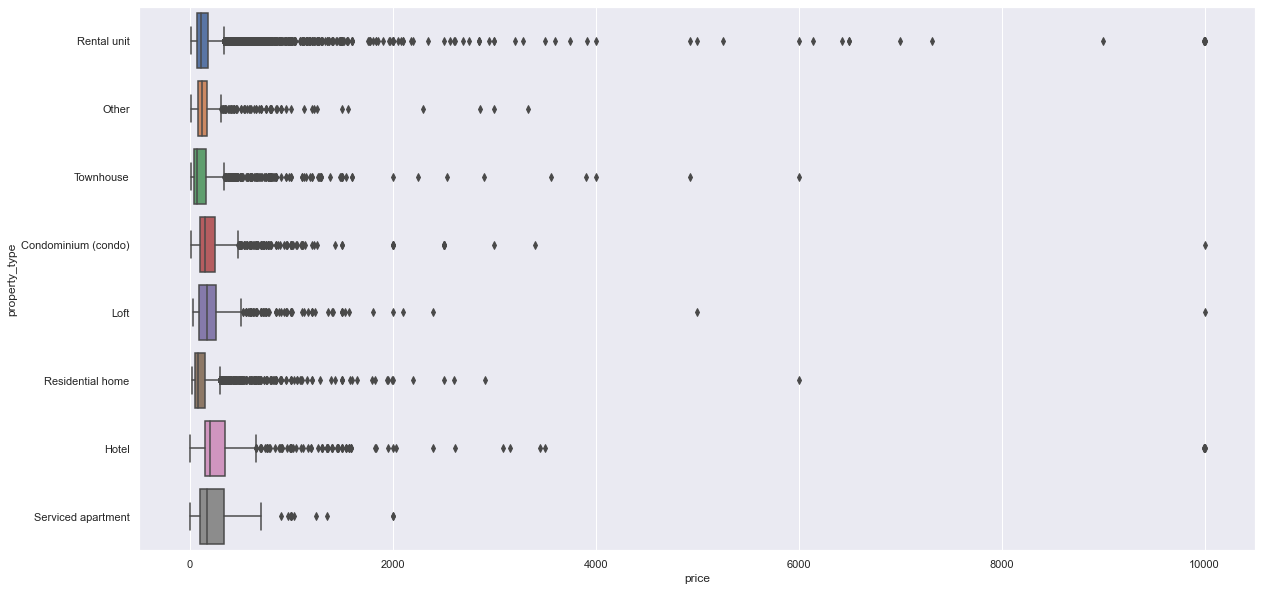

In [62]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.boxplot(data=df1, x='price', y='property_type')

### **room_type**

**From the Data Dictionary:** All homes are grouped into the following four room types:

1. **Entire places** are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies first floor of the home"), and provide further details on the listing.

2. **Private rooms** are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

3. **Shared rooms** are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays.

4. **Hotel rooms** provide a level of service and hospitality associated with traditional hotels. They can be shared or private. The rooms are available in boutique or lifestyle hotels, hostels, bed and breakfasts, or similar properties. They typically include vibrant common areas and rooms with unique touches.

In [63]:
df1['room_type'].value_counts()

Entire home/apt    19655
Private room       16321
Shared room          578
Hotel room           258
Name: room_type, dtype: int64

In [64]:
df1['room_type'].isna().sum()

0

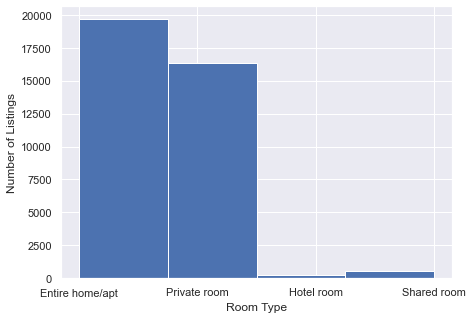

In [65]:
plt.figure(figsize=(7,5))
plt.hist(df1['room_type'], bins=4)
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

### accommodates

**From the Data Dictionary:** The maximum capacity of the listing

In [66]:
df1['accommodates'].value_counts()

2     16767
1      6183
4      5643
3      3712
6      1680
5      1487
8       506
7       321
10      164
16      102
12       93
9        54
11       25
13       23
0        22
14       15
15       15
Name: accommodates, dtype: int64

In [67]:
#there's a value '0' meaning that it accommodates 0 people? is that ok?

### **bathrooms_text**

**From the Data Dictionary:** The number of bathrooms in the listing. 
(On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used.)

Explore **bathrooms_text** data

In [68]:
df1['bathrooms_text'].unique()

array(['1 bath', nan, '1.5 baths', '1 shared bath', '1 private bath',
       'Shared half-bath', '2 baths', '1.5 shared baths', '3 baths',
       'Half-bath', '2.5 baths', '2 shared baths', '0 baths',
       '0 shared baths', 'Private half-bath', '4.5 baths', '5.5 baths',
       '2.5 shared baths', '3.5 baths', '15.5 baths', '5 baths',
       '4 baths', '3 shared baths', '4 shared baths', '6 baths',
       '3.5 shared baths', '6 shared baths', '4.5 shared baths',
       '7.5 baths', '5 shared baths', '6.5 baths', '8 baths', '7 baths',
       '10 baths'], dtype=object)

In [69]:
df1['bathrooms_text'].isna().sum()

105

Create a new column **bathroom_type** that gives information on whether the bathroom is private or shared.

In [70]:
df1.loc[df1['bathrooms_text'].str.contains('shared', na=False), 'bathroom_type'] = 'Shared'

Assumption: If a listing does not specify that it contains a shared bathroom, it will be assumed to have private bathroom(s).

In [71]:
df1.loc[~df1['bathrooms_text'].str.contains('shared', na=False), 'bathroom_type'] = 'Private'

In [72]:
df1.head(6)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathroom_type
0,2595,2008-09-09,a few days or more,34.0,19.0,False,True,Midtown,Manhattan,Rental unit,Entire home/apt,1,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",150.0,30,1125,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33,Private
1,3831,2008-12-07,within a day,50.0,86.0,False,True,Bedford-Stuyvesant,Brooklyn,Other,Entire home/apt,3,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",76.0,1,730,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,5.03,Private
2,5121,2009-02-03,within a day,100.0,not available,False,True,Bedford-Stuyvesant,Brooklyn,Rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",60.0,30,730,t,30,60,90,365,50,0,0,1/22/2014,6/5/2016,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,0.54,Private
3,5136,2009-02-03,within a day,50.0,33.0,False,True,Sunset Park,Brooklyn,Rental unit,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",275.0,5,1125,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,0.02,Private
4,5178,2009-03-03,within an hour,100.0,100.0,False,False,Midtown,Manhattan,Rental unit,Private room,2,1 bath,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",68.0,2,14,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,3.64,Private
5,5203,2009-02-05,not available,not available,not available,False,True,Upper West Side,Manhattan,Rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",75.0,2,14,t,0,0,0,0,118,0,0,10/9/2010,7/12/2017,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,0.89,Shared


Remove attached words in the values so that the column can be converted to a float column.

In [73]:
#replace shared/private with empty string; replace half- with 0.5; replace bath/baths with empty string
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('Half-', '0.5')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('half-', '0.5')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('private', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('shared', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('Shared', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('Private', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('bath', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('s','')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace(' ', '')
df1.head(10)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathroom_type
0,2595,2008-09-09,a few days or more,34.0,19.0,False,True,Midtown,Manhattan,Rental unit,Entire home/apt,1,1,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",150.0,30,1125,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33,Private
1,3831,2008-12-07,within a day,50.0,86.0,False,True,Bedford-Stuyvesant,Brooklyn,Other,Entire home/apt,3,1,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",76.0,1,730,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,5.03,Private
2,5121,2009-02-03,within a day,100.0,not available,False,True,Bedford-Stuyvesant,Brooklyn,Rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",60.0,30,730,t,30,60,90,365,50,0,0,1/22/2014,6/5/2016,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,0.54,Private
3,5136,2009-02-03,within a day,50.0,33.0,False,True,Sunset Park,Brooklyn,Rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",275.0,5,1125,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,0.02,Private
4,5178,2009-03-03,within an hour,100.0,100.0,False,False,Midtown,Manhattan,Rental unit,Private room,2,1,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",68.0,2,14,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,3.64,Private
5,5203,2009-02-05,not available,not available,not available,False,True,Upper West Side,Manhattan,Rental unit,Private room,1,1,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",75.0,2,14,t,0,0,0,0,118,0,0,10/9/2010,7/12/2017,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,0.89,Shared
6,5803,2009-03-10,within a few hours,100.0,100.0,True,True,South Slope,Brooklyn,Townhouse,Private room,2,1.5,1.0,0.0,"[""Dedicated workspace"", ""Iron"", ""Children\u201...",98.0,4,21,t,11,41,71,333,194,15,2,7/29/2010,8/23/2021,4.70,4.71,4.62,4.80,4.82,4.86,4.74,f,1.44,Private
7,6848,2009-05-06,not available,not available,100.0,False,True,Williamsburg,Brooklyn,Rental unit,Entire home/apt,3,1,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",89.0,30,730,t,0,0,0,274,182,1,1,12/4/2009,8/10/2021,4.56,4.59,4.86,4.84,4.80,4.67,4.57,t,1.27,Private
8,6872,2009-05-07,not available,not available,not available,False,True,East Harlem,Manhattan,Condominium (condo),Private room,1,1,1.0,1.0,"[""Dedicated workspace"", ""Dryer"", ""Hot water"", ...",65.0,30,180,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Shared
9,6990,2009-05-12,within an hour,100.0,100.0,False,True,East Harlem,Manhattan,Rental unit,Private room,1,1,1.0,1.0,"[""Breakfast"", ""Hot water"", ""Kitchen"", ""Stove"",...",62.0,30,700,t,0,0,12,287,234,1,0,5/12/2011,7/4/2021,4.88,4.81,4.96,4.96,4.95,4.84,4.84,t,1.86,Shared


In [74]:
df1['bathrooms_text'].value_counts()

1       30657
2        3246
1.5      1675
2.5       379
3         297
0         181
3.5        80
4          74
0.5        66
4.5        21
5          11
6           7
5.5         5
8           3
10          1
6.5         1
7           1
15.5        1
7.5         1
Name: bathrooms_text, dtype: int64

Convert the string column to a float column.

In [75]:
df1['bathrooms_text'] = df1['bathrooms_text'].astype(float)

What to do with missing values?

In [76]:
df1['bathrooms_text'].isna().sum()

105

Since the number of missing values is less than 1% of the total rows, the rows with missing**bathrooms_text** data will be removed.

In [77]:
#remove rows with missing values
df1 = df1.dropna(subset=['bathrooms_text'])

Rename **bathrooms_text** to **bathrooms**

In [78]:
df1 = df1.rename(columns={'bathrooms_text': 'bathrooms'})

### bedrooms

**From the Data Dictionary:** The number of bedrooms

In [79]:
df1.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathroom_type
0,2595,2008-09-09,a few days or more,34.0,19.0,False,True,Midtown,Manhattan,Rental unit,Entire home/apt,1,1.0,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",150.0,30,1125,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33,Private
1,3831,2008-12-07,within a day,50.0,86.0,False,True,Bedford-Stuyvesant,Brooklyn,Other,Entire home/apt,3,1.0,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",76.0,1,730,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,5.03,Private
3,5136,2009-02-03,within a day,50.0,33.0,False,True,Sunset Park,Brooklyn,Rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",275.0,5,1125,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,0.02,Private
4,5178,2009-03-03,within an hour,100.0,100.0,False,False,Midtown,Manhattan,Rental unit,Private room,2,1.0,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",68.0,2,14,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,3.64,Private
5,5203,2009-02-05,not available,not available,not available,False,True,Upper West Side,Manhattan,Rental unit,Private room,1,1.0,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",75.0,2,14,t,0,0,0,0,118,0,0,10/9/2010,7/12/2017,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,0.89,Shared


In [80]:
df1['bedrooms'].value_counts()

1.0     25317
2.0      5177
3.0      1671
4.0       478
5.0       110
6.0        29
8.0        12
7.0         9
9.0         4
10.0        3
14.0        1
11.0        1
13.0        1
Name: bedrooms, dtype: int64

In [81]:
df1['bedrooms'].isna().sum()

3894

This is a little over 10% of the total values. It will not be possible to drop the rows without skewing the data. 
Look for any patterns in the missing values.

Fill in missing values

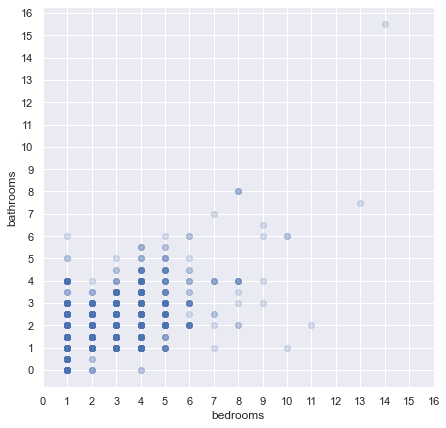

In [82]:
#plot bedrooms and bathrooms
ba = df1.bathrooms
be = df1.bedrooms
plt.scatter(be, ba, alpha=0.2)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.gcf().set_size_inches(7, 7)
plt.show()

<AxesSubplot:>

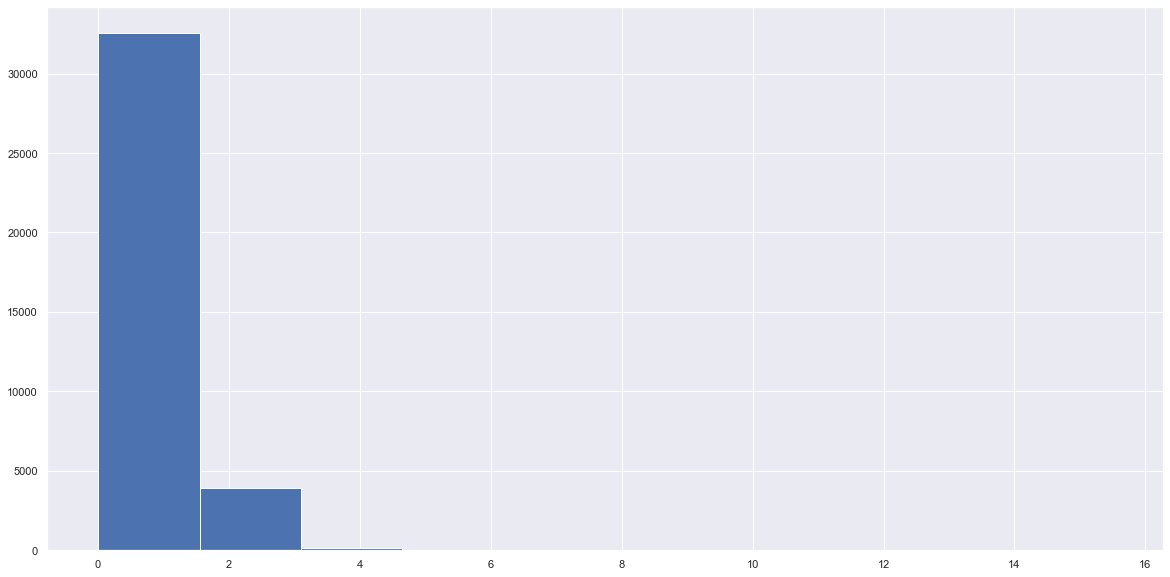

In [84]:
df1['bathrooms'].hist()

In [85]:
#df1['bathroom_cat'] = df1['bathroom'].apply(func)
df1[['bathrooms','bedrooms']].groupby('bathrooms').median()

,bedrooms
bathrooms,
0.0,1.0
0.5,1.0
1.0,1.0
1.5,1.0
2.0,2.0
2.5,3.0
3.0,3.0
3.5,4.0
4.0,4.0


In [87]:
df1.bedrooms = df1.bedrooms.fillna(df1.bathrooms)

In [88]:
import math
df1.bedrooms = df1.bedrooms.apply(lambda x: math.ceil(x))

In [89]:
df1.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathroom_type
0,2595,2008-09-09,a few days or more,34.0,19.0,False,True,Midtown,Manhattan,Rental unit,Entire home/apt,1,1.0,1,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",150.0,30,1125,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33,Private
1,3831,2008-12-07,within a day,50.0,86.0,False,True,Bedford-Stuyvesant,Brooklyn,Other,Entire home/apt,3,1.0,1,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",76.0,1,730,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,5.03,Private
3,5136,2009-02-03,within a day,50.0,33.0,False,True,Sunset Park,Brooklyn,Rental unit,Entire home/apt,4,1.5,2,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",275.0,5,1125,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,0.02,Private
4,5178,2009-03-03,within an hour,100.0,100.0,False,False,Midtown,Manhattan,Rental unit,Private room,2,1.0,1,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",68.0,2,14,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,3.64,Private
5,5203,2009-02-05,not available,not available,not available,False,True,Upper West Side,Manhattan,Rental unit,Private room,1,1.0,1,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",75.0,2,14,t,0,0,0,0,118,0,0,10/9/2010,7/12/2017,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,0.89,Shared


### beds

In [90]:
df1['beds'].value_counts()

1.0     22281
2.0      7674
3.0      2725
0.0      1500
4.0      1190
5.0       382
6.0       202
7.0        81
8.0        50
9.0        29
10.0       12
12.0        8
11.0        6
13.0        4
16.0        2
15.0        2
17.0        1
42.0        1
24.0        1
21.0        1
Name: beds, dtype: int64

In [91]:
df1['beds'].isna().sum()

555

This is 1.5% of the total values.
Since it's less than 5% of the total values, the rows with missing **beds** data will be dropped.

In [92]:
#remove rows with missing values
df1 = df1.dropna(subset=['beds'])

### **amenities**

In [93]:
from ast import literal_eval


df1['amenities'] = df1['amenities'].apply(lambda row: literal_eval(row))

In [94]:
#Separating all the individual amenities

all_amenities = [value for sublist in df1['amenities'] for value in sublist]

from collections import Counter

result = Counter(all_amenities)

amens = result.most_common(50)

Choosing top 50 most common amenities

In [95]:
amens

[('Wifi', 34911),
 ('Long term stays allowed', 33348),
 ('Heating', 32715),
 ('Kitchen', 32468),
 ('Essentials', 32270),
 ('Smoke alarm', 31892),
 ('Air conditioning', 30327),
 ('Hangers', 27333),
 ('Carbon monoxide alarm', 26780),
 ('Hair dryer', 22863),
 ('Iron', 22579),
 ('Dedicated workspace', 22486),
 ('Shampoo', 22467),
 ('Hot water', 21850),
 ('TV', 17857),
 ('Dishes and silverware', 17150),
 ('Refrigerator', 16974),
 ('Cooking basics', 16027),
 ('Microwave', 15233),
 ('Fire extinguisher', 14369),
 ('Washer', 14265),
 ('Dryer', 13852),
 ('Stove', 13725),
 ('Oven', 13626),
 ('Free street parking', 13508),
 ('Coffee maker', 13503),
 ('Bed linens', 13452),
 ('First aid kit', 12508),
 ('Extra pillows and blankets', 8981),
 ('Private entrance', 8975),
 ('Lock on bedroom door', 8654),
 ('Elevator', 8618),
 ('Cable TV', 7637),
 ('TV with standard cable', 7381),
 ('Dishwasher', 6744),
 ('Luggage dropoff allowed', 6499),
 ('Security cameras on property', 5623),
 ('Bathtub', 5573),
 ('Loc

In [96]:
amensdf = pd.DataFrame([result])
amensdf.T.head()

,0
Free street parking,13508
Heating,32715
TV,17857
Dedicated workspace,22486
Cleaning before checkout,1505


In the Exploratory Data Analysis phase of the data science method, techniques can be employed to understand and analyze how particular amenities affect the price of a listing and how much. Thus, this information, for now, will be left as is.

### minimum_nights and maximum_nights

In [97]:
df1['minimum_nights'].isna().sum()

0

In [98]:
df1['maximum_nights'].isna().sum()

0

Leave the columns as is.

### **has_availability**

In [99]:
df1['has_availability'].unique()

array(['t', 'f'], dtype=object)

In [100]:
df1 = df1.replace({'has_availability': {'t':True, 'f':False}})

In [101]:
df1['has_availability'].isna().sum()

0

### availability_30, availability_60, availability_90, availability_365

In [102]:
df1['availability_30'].isna().sum()

0

In [103]:
df1['availability_60'].isna().sum()

0

In [104]:
df1['availability_90'].isna().sum()

0

In [105]:
df1['availability_365'].isna().sum()

0

There are no missing values, so we'll leave the columns as is.

### number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d

**From the Data Dictionary:**
1. number_of_reviews = The number of reviews the listing has
2. number_of_reviews_ltm = The number of reviews the listing has (in the last 12 months)
3. number_of_reviews_l30d = The number of reviews the listing has (in the last 30 days)

In [106]:
df1['number_of_reviews'].isna().sum()
df1['number_of_reviews_ltm'].isna().sum()
df1['number_of_reviews_l30d'].isna().sum()

0

Keeping the columns as is.

### first_review, last_review

Convert **first_review** and **last_review** to datetime

In [107]:
#Convert first_review to Datetime
df1['first_review'] = pd.to_datetime(df1['first_review'])

In [108]:
assert df1['first_review'].dtype=='datetime64[ns]'

In [109]:
#Convert last_review to Datetime
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [110]:
assert df1['last_review'].dtype=='datetime64[ns]'

In [111]:
df1['first_review'].isna().sum()

8837

In [112]:
df1['last_review'].isna().sum()

8837

For both **first_review** and **last_review**, 25% of the values are missing. As this is a large proportion of the data, filling in the missing data or removing the rows containing missing values are not techniques that will work. 

It is important to note that the missign data could indicate that a quarter of the listings were not given ratings. This might have a potential affect on the price of the listing. Thus, the missing data will be kept.

### Various review_scores Columns

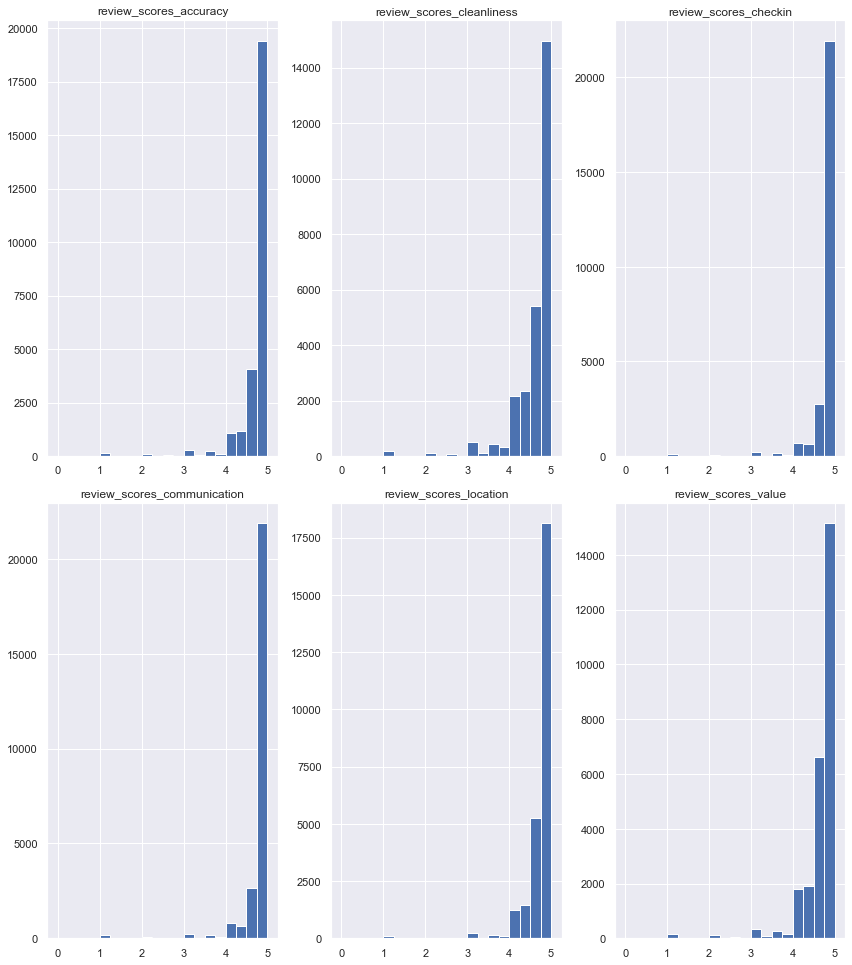

In [113]:
#Using 'hist' method to plot histograms in order to map the distributions
review_scores = df1[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
fig = plt.figure(figsize=(12,20))
for i, review in enumerate(review_scores):
    ax = fig.add_subplot(3,3,i+1)
    df1[review].hist(bins=20)
    ax.set_title(review)
fig.tight_layout()
plt.show()

Fill in missing values

In [114]:
df1['review_scores_accuracy'].isna().sum()
df1['review_scores_cleanliness'].isna().sum()
df1['review_scores_checkin'].isna().sum()
df1['review_scores_communication'].isna().sum()
df1['review_scores_location'].isna().sum()
df1['review_scores_value'].isna().sum()

9469

As this is a large proportion of the data, filling in the missing data or removing the rows containing missing values are not techniques that will work.

It is important to note that the fact these values are missing might mean that reviews weren't provided and thus, might have a potential affect on the price of the listing. Hence, the columns will be left as is.

### **instant_bookable**

In [115]:
df1 = df1.replace({'instant_bookable': {'t':True, 'f':False}})

In [116]:
df1['instant_bookable'].isna().sum()

0

### reviews_per_month

**From Data Dictionary:** The number of reviews the listing has over the lifetime of the listing

In [117]:
df1['reviews_per_month'].isna().sum()

8837

As this is a large proportion of the data, filling in the missing data or removing the rows containing missing values are not techniques that will work.

It is important to note that the fact these values are missing might mean that reviews weren't provided and thus, might have a potential affect on the price of the listing. Hence, the columns will be left as is.

## Final Look At Dataset

In [118]:
df1.head(10)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathroom_type
0,2595,2008-09-09,a few days or more,34.0,19.0,False,True,Midtown,Manhattan,Rental unit,Entire home/apt,1,1.0,1,1.0,"[Free street parking, Heating, TV, Dedicated w...",150.0,30,1125,True,5,35,65,340,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,False,0.33,Private
1,3831,2008-12-07,within a day,50.0,86.0,False,True,Bedford-Stuyvesant,Brooklyn,Other,Entire home/apt,3,1.0,1,3.0,"[Dedicated workspace, Iron, Stove, Hair dryer,...",76.0,1,730,True,0,4,9,208,408,58,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,False,5.03,Private
3,5136,2009-02-03,within a day,50.0,33.0,False,True,Sunset Park,Brooklyn,Rental unit,Entire home/apt,4,1.5,2,2.0,"[Dryer, BBQ grill, Kitchen, Long term stays al...",275.0,5,1125,True,0,0,0,204,2,1,1,2014-01-02,2021-08-08,5.00,5.00,5.00,5.00,5.00,4.50,5.00,False,0.02,Private
4,5178,2009-03-03,within an hour,100.0,100.0,False,False,Midtown,Manhattan,Rental unit,Private room,2,1.0,1,1.0,"[Hot water, Bed linens, Extra pillows and blan...",68.0,2,14,True,1,5,14,243,490,17,2,2010-08-18,2021-08-14,4.21,4.20,3.73,4.66,4.40,4.86,4.36,False,3.64,Private
5,5203,2009-02-05,not available,not available,not available,False,True,Upper West Side,Manhattan,Rental unit,Private room,1,1.0,1,1.0,"[Hot water, Smoke alarm, Paid parking off prem...",75.0,2,14,True,0,0,0,0,118,0,0,2010-10-09,2017-07-12,4.91,4.83,4.82,4.97,4.95,4.94,4.92,False,0.89,Shared
6,5803,2009-03-10,within a few hours,100.0,100.0,True,True,South Slope,Brooklyn,Townhouse,Private room,2,1.5,1,0.0,"[Dedicated workspace, Iron, Children’s books a...",98.0,4,21,True,11,41,71,333,194,15,2,2010-07-29,2021-08-23,4.70,4.71,4.62,4.80,4.82,4.86,4.74,False,1.44,Private
7,6848,2009-05-06,not available,not available,100.0,False,True,Williamsburg,Brooklyn,Rental unit,Entire home/apt,3,1.0,1,1.0,"[Free street parking, Heating, TV, Dedicated w...",89.0,30,730,True,0,0,0,274,182,1,1,2009-12-04,2021-08-10,4.56,4.59,4.86,4.84,4.80,4.67,4.57,True,1.27,Private
8,6872,2009-05-07,not available,not available,not available,False,True,East Harlem,Manhattan,Condominium (condo),Private room,1,1.0,1,1.0,"[Dedicated workspace, Dryer, Hot water, Paid p...",65.0,30,180,True,30,60,90,365,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Shared
9,6990,2009-05-12,within an hour,100.0,100.0,False,True,East Harlem,Manhattan,Rental unit,Private room,1,1.0,1,1.0,"[Breakfast, Hot water, Kitchen, Stove, Long te...",62.0,30,700,True,0,0,12,287,234,1,0,2011-05-12,2021-07-04,4.88,4.81,4.96,4.96,4.95,4.84,4.84,True,1.86,Shared
10,7064,2009-05-15,not available,not available,0.0,False,True,Williamsburg,Brooklyn,Loft,Private room,1,1.0,1,1.0,"[Kitchen, Smoke alarm, Heating, Hangers, Dedic...",90.0,27,45,True,0,14,14,201,9,0,0,2011-08-09,2015-08-31,4.86,5.00,4.86,5.00,5.00,5.00,5.00,False,0.07,Shared


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36152 entries, 0 to 36922
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            36152 non-null  int64         
 1   host_since                    36152 non-null  datetime64[ns]
 2   host_response_time            36152 non-null  object        
 3   host_response_rate            36152 non-null  object        
 4   host_acceptance_rate          36152 non-null  object        
 5   host_is_superhost             36152 non-null  bool          
 6   host_identity_verified        36152 non-null  bool          
 7   neighbourhood_cleansed        36152 non-null  object        
 8   neighbourhood_group_cleansed  36152 non-null  object        
 9   property_type                 36152 non-null  object        
 10  room_type                     36152 non-null  object        
 11  accommodates                

In [120]:
df1.isna().sum()

id                                 0
host_since                         0
host_response_time                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
host_identity_verified             0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
f